In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras import Sequential
from tensorflow.keras.datasets.fashion_mnist import load_data
from tensorflow.keras.utils import to_categorical

# 0. Keras

In [7]:
(X_train, y_train), (X_test, y_test) = fashion_mnistData

NameError: name 'fashion_mnistData' is not defined

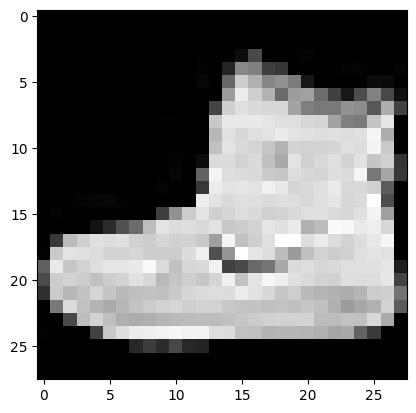

In [78]:
# 데이터 확인
plt.imshow(X_train[0], cmap = 'gray')
plt.show()

In [79]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((60000, 28, 28), (10000, 28, 28), (60000,), (10000,))

In [80]:
# 학습용으로 변환
y_train_oh = to_categorical(y_train)
y_test_oh = to_categorical(y_test)
y_train_oh

array([[0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [81]:
# 학습용으로 변환
X_train_R = X_train.reshape(-1, 28*28)
X_test_R = X_test.reshape(-1, 28*28)
X_test_R.shape

(10000, 784)

In [82]:
# 학습
model = Sequential()
model.add(Dense(units = 64, input_dim = 784, activation = 'relu'))
model.add(Dense(units = 32, input_dim = 64, activation = 'relu'))
model.add(Dense(units = 10, input_dim = 32, activation = 'softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['acc'])
model.fit(X_train_R, y_train_oh, epochs = 20)

Epoch 1/20
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6348 - acc: 0.7067
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5882 - acc: 0.8006
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5215 - acc: 0.8202
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4922 - acc: 0.8274
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4647 - acc: 0.8369
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4466 - acc: 0.8426
Epoch 7/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4319 - acc: 0.8474
Epoch 8/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4207 - acc: 0.8519
Epoch 9/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4147 - acc: 0.8512
Epoch 10/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4039 - acc: 0.8557
Epoch 11/20
1875/1875 [======

In [83]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns

In [84]:
print(classification_report(y_train_oh.argmax(axis = 1), model.predict(X_train_R).argmax(axis = 1), digits = 10))

1875/1875 [==============================] - 3s 1ms/step
              precision    recall  f1-score   support

           0  0.8074563473 0.8555000000 0.8307841709      6000
           1  0.9870479394 0.9780000000 0.9825031394      6000
           2  0.7513064863 0.8146666667 0.7817047817      6000
           3  0.8374962831 0.9388333333 0.8852742417      6000
           4  0.7882779058 0.7980000000 0.7931091602      6000
           5  0.9939707149 0.9616666667 0.9775518848      6000
           6  0.7648290300 0.5480000000 0.6385085931      6000
           7  0.9389051808 0.9605000000 0.9495798319      6000
           8  0.9628099174 0.9708333333 0.9668049793      6000
           9  0.9526229508 0.9685000000 0.9604958678      6000

    accuracy                      0.8794500000     60000
   macro avg  0.8784722756 0.8794500000 0.8766316651     60000
weighted avg  0.8784722756 0.8794500000 0.8766316651     60000



313/313 [==============================] - 0s 1ms/step


<Axes: >

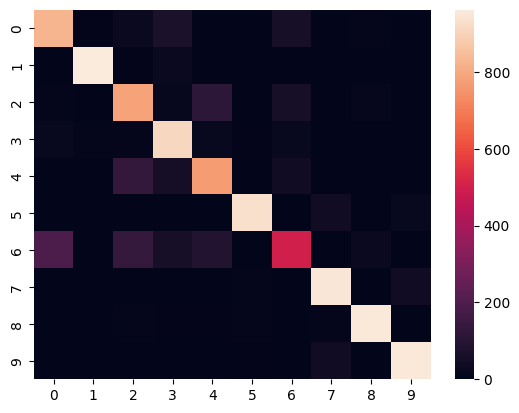

In [85]:
sns.heatmap(confusion_matrix(y_test_oh.argmax(axis = 1), model.predict(X_test_R).argmax(axis = 1)))

In [86]:
print(classification_report(y_test_oh.argmax(axis = 1), model.predict(X_test_R).argmax(axis = 1), digits = 10))

313/313 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0  0.7823193916 0.8230000000 0.8021442495      1000
           1  0.9786368260 0.9620000000 0.9702471004      1000
           2  0.7115559600 0.7820000000 0.7451167222      1000
           3  0.7985989492 0.9120000000 0.8515406162      1000
           4  0.7672327672 0.7680000000 0.7676161919      1000
           5  0.9689119171 0.9350000000 0.9516539440      1000
           6  0.7210982659 0.4990000000 0.5898345154      1000
           7  0.9097022094 0.9470000000 0.9279764821      1000
           8  0.9463753724 0.9530000000 0.9496761335      1000
           9  0.9351669941 0.9520000000 0.9435084242      1000

    accuracy                      0.8533000000     10000
   macro avg  0.8519598653 0.8533000000 0.8499314379     10000
weighted avg  0.8519598653 0.8533000000 0.8499314379     10000



313/313 [==============================] - 0s 1ms/step


<Axes: >

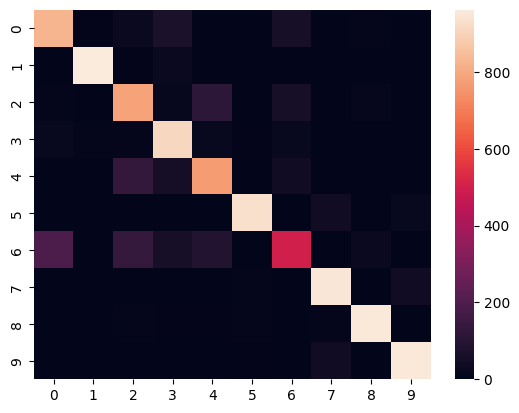

In [87]:
sns.heatmap(confusion_matrix(y_test_oh.argmax(axis = 1), model.predict(X_test_R).argmax(axis = 1)))

# 1. Pytorch ver
- 정확도까지만!

In [88]:
import torch
from torch.optim import Adam
from torch.nn import Linear, MSELoss, Sequential, Softmax, CrossEntropyLoss, Sigmoid , BCELoss, ReLU, Module
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [89]:
class FM_Model(Module):
    def __init__(self):
        super().__init__()
        self.nn1 = Linear(784,32)
        self.relu1 = ReLU()
        self.nn2 = Linear(32,10)
        self.sof1 = Softmax(dim = 1)

    def forward(self, x):
        print('forward call')
        x = self.nn1(x)
        x = self.relu1(x)
        x = self.nn2(x)
        x = self.sof1(x)
        return x

In [90]:
X_train_R, X_test_R, y_train_oh, y_test_oh

(array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 array([[0., 0., 0., ..., 0., 0., 1.],
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], dtype=float32),
 array([[0., 0., 0., ..., 0., 0., 1.],
        [0., 0., 1., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 1., 0.],
        [0., 1., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], dtype=float32))

In [91]:
x = torch.FloatTensor(X_train_R)
y = torch.FloatTensor(y_train_oh)

In [92]:
model = FM_Model()
print(model.parameters())
loss_fn = CrossEntropyLoss()
optimizer = Adam(model.parameters(), lr = 0.01)

for epoch in range(50):
    optimizer.zero_grad()
    hx = model(x)
    pred = (hx.detach().numpy() > 0.5) + 0
    print(f'정확도:{(y.detach().numpy()==pred).mean()}')
    cost = loss_fn(hx, y)
    cost.backward()
    optimizer.step()
    print(f'cost:{cost.item()}')
    print('==============')

<generator object Module.parameters at 0x0000024DE9DB82E0>
forward call
정확도:0.8137033333333333
cost:2.3888063430786133
forward call
정확도:0.8326733333333334
cost:2.297683000564575
forward call
정확도:0.8378133333333333
cost:2.2719664573669434
forward call
정확도:0.8364566666666666
cost:2.2787628173828125
forward call
정확도:0.8377066666666667
cost:2.272534132003784
forward call
정확도:0.83826
cost:2.2697808742523193
forward call
정확도:0.8385666666666667
cost:2.2682769298553467
forward call
정확도:0.8388133333333333
cost:2.267045736312866
forward call
정확도:0.8389833333333333
cost:2.2662124633789062
forward call
정확도:0.83908
cost:2.265739917755127
forward call
정확도:0.83916
cost:2.2653398513793945
forward call
정확도:0.8392
cost:2.2651360034942627
forward call
정확도:0.8392066666666667
cost:2.265109062194824
forward call
정확도:0.83923
cost:2.264986038208008
forward call
정확도:0.8392566666666667
cost:2.264859914779663
forward call
정확도:0.8392633333333334
cost:2.2648215293884277
forward call
정확도:0.83926
cost:2.264820337295

In [106]:
hx = model(x)
pred = (hx.detach().numpy() > 0.5) + 0
print(f'정확도:{(y.detach().numpy()==pred).mean()}')

forward call
정확도:0.8394566666666666
